In [1]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_obs = pd.read_csv("F:\Codecademy\Exercises\Biodiversity\observations.csv")
df_obs.describe(include="all")

,scientific_name,park_name,observations
count,23296,23296,23296.000000
unique,5541,4,NaN
top,Holcus lanatus,Yellowstone National Park,NaN
freq,12,5824,NaN
mean,NaN,NaN,142.287904
std,NaN,NaN,69.890532
min,NaN,NaN,9.000000
25%,NaN,NaN,86.000000
50%,NaN,NaN,124.000000
75%,NaN,NaN,195.000000


In [3]:
print(df_obs.head(10))

                     scientific_name                            park_name  \
0                 Vicia benghalensis  Great Smoky Mountains National Park   
1                     Neovison vison  Great Smoky Mountains National Park   
2                  Prunus subcordata               Yosemite National Park   
3               Abutilon theophrasti                  Bryce National Park   
4           Githopsis specularioides  Great Smoky Mountains National Park   
5  Elymus virginicus var. virginicus               Yosemite National Park   
6                   Spizella pusilla            Yellowstone National Park   
7                  Elymus multisetus  Great Smoky Mountains National Park   
8             Lysimachia quadrifolia               Yosemite National Park   
9         Diphyscium cumberlandianum            Yellowstone National Park   

   observations  
0            68  
1            77  
2           138  
3            84  
4            85  
5           112  
6           228  
7       

c:\Users\ccana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


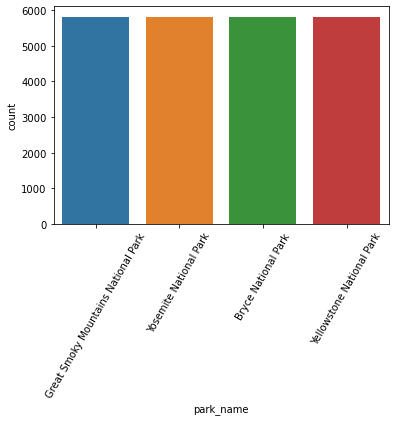

In [4]:
sns.countplot(df_obs["park_name"])
plt.xticks(rotation=60, fontsize=10)
plt.show()

c:\Users\ccana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


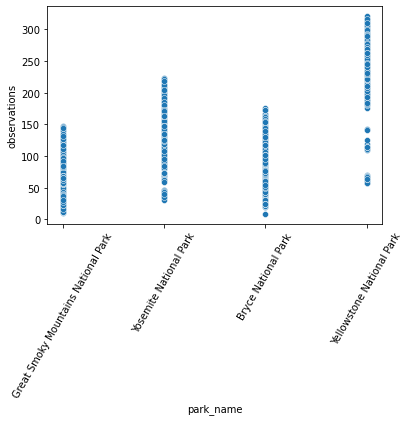

In [5]:
plt.clf()

sns.scatterplot(df_obs["park_name"], df_obs["observations"])
plt.xticks(rotation=60, fontsize=10)
plt.show()

<Figure size 432x288 with 0 Axes>

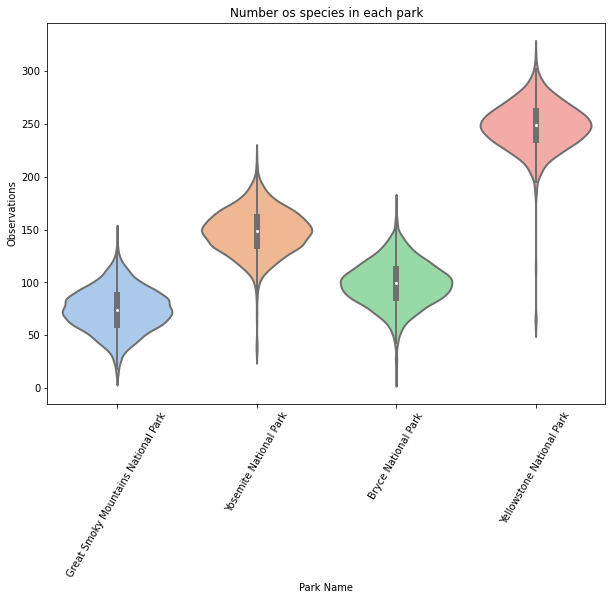

In [6]:
#investigar o % de missing data
plt.clf()

fig = plt.figure(figsize =(10, 7))
ax = sns.violinplot( x = "park_name", y ="observations",data = df_obs,  linewidth = 2, palette="pastel")
plt.xlabel("Park Name")
plt.ylabel("Observations")
plt.title("Number os species in each park")
plt.xticks(rotation=60, fontsize=10)
plt.show()


Yellowstone National Park possui o maior número de espécies observadas.

In [7]:
#median of observed species per park

print("Median observations per park: ")
df_obs[["observations", "park_name"]].groupby("park_name").median()

Median observations per park: 


,observations
park_name,
Bryce National Park,99
Great Smoky Mountains National Park,74
Yellowstone National Park,249
Yosemite National Park,149


In [8]:
df_obs[["scientific_name", "observations"]].groupby("scientific_name").count()

,observations
scientific_name,
Abies bifolia,4
Abies concolor,4
Abies fraseri,4
Abietinella abietina,4
Abronia ammophila,4
...,...
Zonotrichia leucophrys gambelii,4
Zonotrichia leucophrys oriantha,4
Zonotrichia querula,4


Vamos analisar o dataframe sobre as espécies.

In [9]:
df_species = pd.read_csv("F:\Codecademy\Exercises\Biodiversity\species_info.csv")
df_species.describe(include="all")

,category,scientific_name,common_names,conservation_status
count,5824,5824,5824,191
unique,7,5541,5504,4
top,Vascular Plant,Holcus lanatus,Brachythecium Moss,Species of Concern
freq,4470,3,7,161


In [10]:
print(df_species.head(10))

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   
5   Mammal         Odocoileus virginianus   
6   Mammal                     Sus scrofa   
7   Mammal                  Canis latrans   
8   Mammal                    Canis lupus   
9   Mammal                    Canis rufus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  
5                                  White-Tailed Deer  

In [11]:
max_rows = df_species["scientific_name"].count()
print("% Missing data: ")
print((1 - df_species.count() / max_rows)* 100)


% Missing data: 
category                0.000000
scientific_name         0.000000
common_names            0.000000
conservation_status    96.720467
dtype: float64


conservation_status tem um número muito elevado de missing data.
Precisamos investigar isso melhor

In [12]:
df_species[["conservation_status", "category"]].groupby("category").count()

,conservation_status
category,
Amphibian,7
Bird,79
Fish,11
Mammal,38
Nonvascular Plant,5
Reptile,5
Vascular Plant,46


In [13]:
df_species.dtypes

category               object
scientific_name        object
common_names           object
conservation_status    object
dtype: object

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Mammal'),
  Text(1, 0, 'Bird'),
  Text(2, 0, 'Reptile'),
  Text(3, 0, 'Amphibian'),
  Text(4, 0, 'Fish'),
  Text(5, 0, 'Vascular Plant'),
  Text(6, 0, 'Nonvascular Plant')])

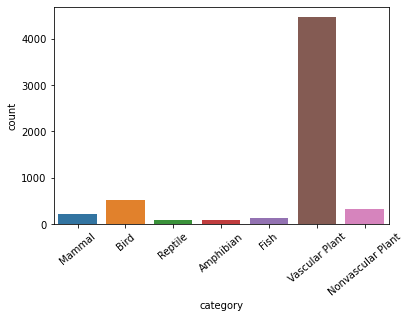

In [14]:
#para entender o tamanho de cada categoria de modo visual
sns.countplot(data=df_species, x='category')
plt.xticks(rotation=40)

Qual categoria possui o maior número de missing data?
Vamos isolar estes dados para avaliá-los.

            category  conservation_status
0          Amphibian                   73
1               Bird                  442
2               Fish                  116
3             Mammal                  176
4  Nonvascular Plant                  328
5            Reptile                   74
6     Vascular Plant                 4424


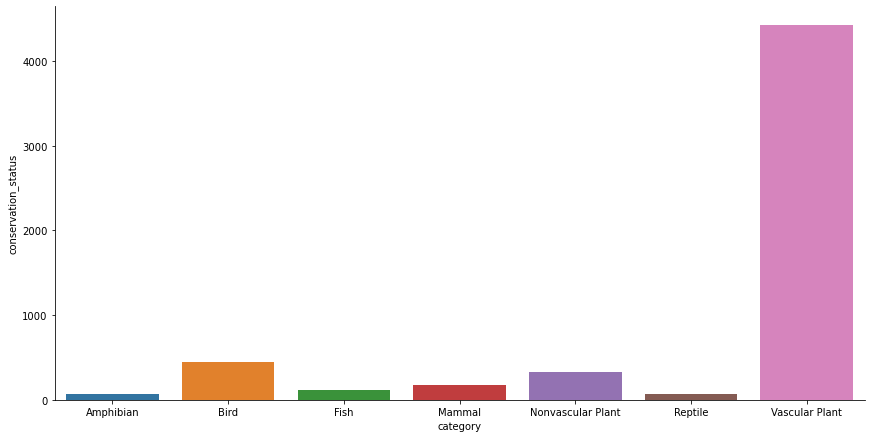

In [15]:
#missing data analysis
md_species = df_species[["conservation_status"]].isnull().groupby(df_species["category"]).sum().reset_index()
print(md_species)

B = sns.catplot(data=md_species,
kind="bar",
x="category", y="conservation_status",
aspect=2,
height=6
)

Vascular Plant is the category with most missing data in dataframe: 4424

In [28]:
print(df_species["conservation_status"].head(10))

0                   NaN
1                   NaN
2                   NaN
3                   NaN
4                   NaN
5                   NaN
6                   NaN
7    Species of Concern
8            Endangered
9            Endangered
Name: conservation_status, dtype: object


<AxesSubplot:xlabel='conservation_status', ylabel='count'>

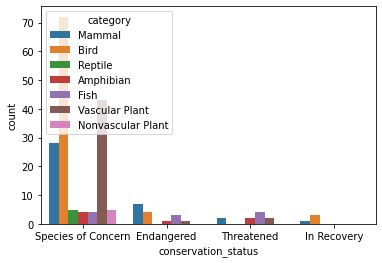

In [17]:
sns.countplot(data=df_species, x="conservation_status", hue="category")

In [18]:
#calculate the proportion in each category
df_species.conservation_status.value_counts(normalize = True, ascending=True)

In Recovery           0.020942
Threatened            0.052356
Endangered            0.083770
Species of Concern    0.842932
Name: conservation_status, dtype: float64

Mais de 84% são de espécies em extinção.

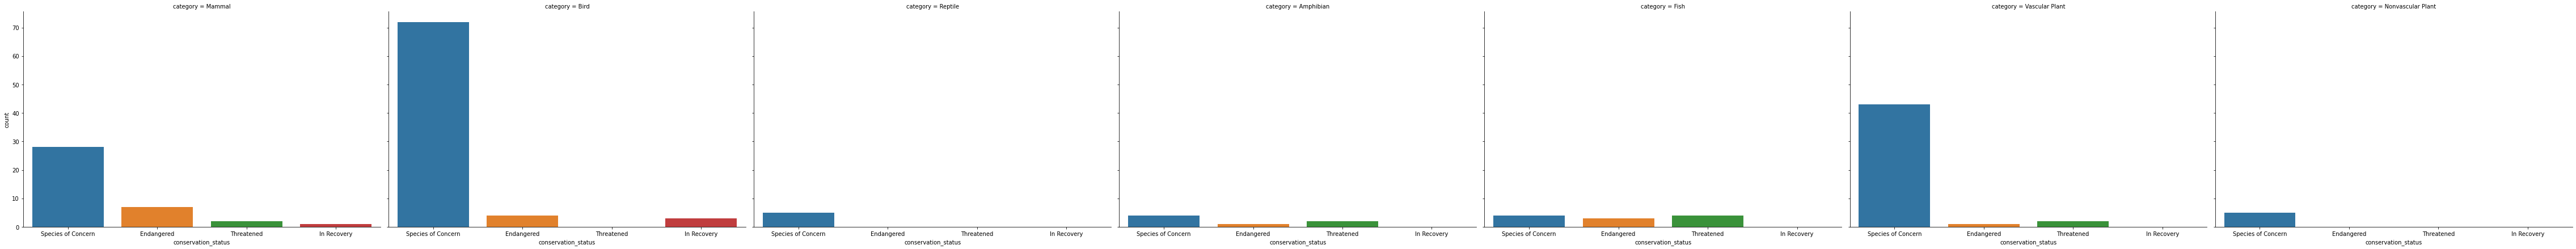

In [19]:
employ_fig = sns.catplot(data=df_species,
kind="count",
x="conservation_status", col="category",
aspect=1.5,
height=6)

In [40]:
#vamos analisar missing data de melhor quantidade: Amphibian
amphibian_cat = df_species[df_species.category == "Amphibian"]
print(amphibian_cat.head())



      category             scientific_name                     common_names  \
411  Amphibian  Bufo americanus americanus            Eastern American Toad   
412  Amphibian                Bufo fowleri  Fowler's Toad, Woodhouse's Toad   
413  Amphibian   Acris crepitans crepitans            Northern Cricket Frog   
414  Amphibian           Hyla chrysoscelis             Cope's Gray Treefrog   
415  Amphibian             Hyla versicolor                    Gray Treefrog   

    conservation_status  
411                 NaN  
412                 NaN  
413                 NaN  
414                 NaN  
415                 NaN  


In [36]:
amphibian_cat['conservation_status'].isna().sum()

73

Vamos trabalhar com os dados sem NaN, pois são muitos.
Assim podemos avaliar realmente o número de espécies em extinção, com uma base super reduzida.

In [43]:
#selecionar rows que não possuem NaN como valor
df_species_clean = df_species[~df_species['conservation_status'].isna()]

In [45]:
print(df_species_clean.head())

   category            scientific_name       common_names conservation_status
7    Mammal              Canis latrans             Coyote  Species of Concern
8    Mammal                Canis lupus          Gray Wolf          Endangered
9    Mammal                Canis rufus           Red Wolf          Endangered
29   Mammal           Eptesicus fuscus      Big Brown Bat  Species of Concern
30   Mammal  Lasionycteris noctivagans  Silver-Haired Bat  Species of Concern


In [50]:
df_species_clean.describe(include="all")

,category,scientific_name,common_names,conservation_status
count,191,191,191,191
unique,7,179,190,4
top,Bird,Myotis lucifugus,"Gray Wolf, Wolf",Species of Concern
freq,79,3,2,161


In [46]:
df_species_clean.conservation_status.value_counts(normalize = True, ascending=True)

In Recovery           0.020942
Threatened            0.052356
Endangered            0.083770
Species of Concern    0.842932
Name: conservation_status, dtype: float64

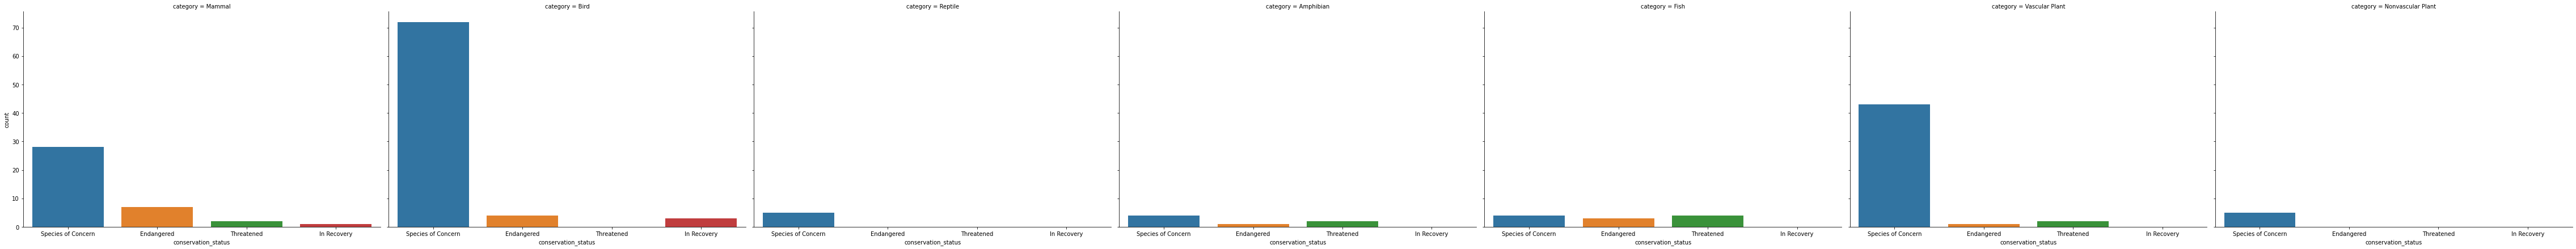

In [47]:
employ_fig = sns.catplot(data=df_species_clean,
kind="count",
x="conservation_status", col="category",
aspect=1.5,
height=6)

Será que houve grande mudança na amostra por categoria?
Sim, na nova amostragem, os Birds são maioria. Seguido por Vascular Plants e Mammal.


<AxesSubplot:xlabel='category', ylabel='count'>

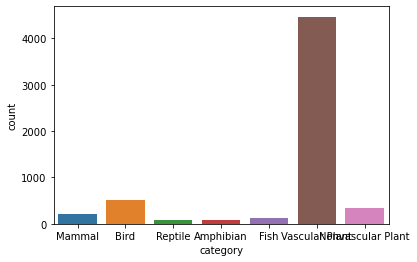

In [56]:
sns.countplot(data=df_species, x="category")

<AxesSubplot:xlabel='category', ylabel='count'>

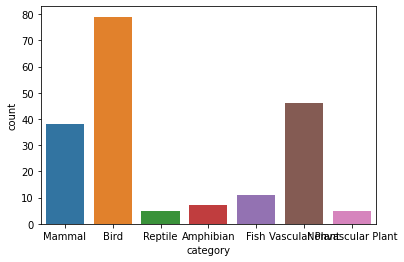

In [55]:
sns.countplot(data=df_species_clean, x="category")

O missing data têm alguma relação com outros valores?

In [60]:
#separar somente os que tem NaN como resultado para conservation_status

df_species_nan = df_species[df_species['conservation_status'].isna()]
df_species_nan.describe()

,category,scientific_name,common_names,conservation_status
count,5633,5633,5633,0
unique,7,5363,5324,0
top,Vascular Plant,Hypochaeris radicata,Brachythecium Moss,NaN
freq,4424,3,7,NaN


In [61]:
print(df_species_nan.head(10))

   category                scientific_name  \
0    Mammal  Clethrionomys gapperi gapperi   
1    Mammal                      Bos bison   
2    Mammal                     Bos taurus   
3    Mammal                     Ovis aries   
4    Mammal                 Cervus elaphus   
5    Mammal         Odocoileus virginianus   
6    Mammal                     Sus scrofa   
10   Mammal       Urocyon cinereoargenteus   
11   Mammal                   Vulpes fulva   
12   Mammal                  Vulpes vulpes   

                                         common_names conservation_status  
0                            Gapper's Red-Backed Vole                 NaN  
1                               American Bison, Bison                 NaN  
2   Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3   Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                       Wapiti Or Elk                 NaN  
5                                   W